# TP4 Kernel Methods for Machine Learning

Written by Yunlong Jiao, 28 Jan 2019

In [1]:
# setup
import numpy as np
#import pandas as pd
from sklearn import linear_model as lm
from sklearn.model_selection import cross_val_score as cvs
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
print(sys.version)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
import sklearn
sklearn.__version__

'0.19.2'

## Tasks

1. Generate 20 binary classification samples (10 from each class $y = 1$ and $y = −1$). Use $\mathbf{x} \in \mathbb{R}^2$, for visualization purpose, where each element $x \sim \mathcal{N}(\mu_y,\sigma^2), \mu_1 = 0, \mu_{-1}=1, \sigma=1$. Generate 1000 separate testing samples from the same distribution. Visualize training data.
2. Train a linear SVM with parameter $C = 10$ on the training set, using the function `sklearn.svm.LinearSVC`. Inspect the resulting object (see code).
3. Plot the points and the decision boundaries of a linear SVM. Recall: the boundary (separating hyperplane) is the set of points for which $f(x) = 0$. Try different values of $C$, and visualize the effect of $C$ on the margin and number of support vectors.
4. Train a linear SVM with values of $C$ between $10^{−3}$ and $1$. Plot and analyze the training and testing classification errors as a function of $C$. Question: Why can't we overfit more?
5. Choose $C$ by cross-validation.

## Solutions

In [4]:
# Simulate data
np.random.seed(54321)
p = 2

# Training data
ntrain = 20
ntrain_pos = int(ntrain/2)
ntrain_neg = ntrain - ntrain_pos
Xtrain = np.vstack([np.random.normal(0,1,(ntrain_pos,p)),
                    np.random.normal(1,1,(ntrain_neg,p))])
ytrain = np.concatenate([np.repeat(1,ntrain_pos),
                         np.repeat(-1,ntrain_neg)])

# Testing data
ntest = 1000
ntest_pos = int(ntest/2)
ntest_neg = ntest - ntest_pos
Xtest = np.vstack([np.random.normal(0,1,(ntest_pos,p)),
                   np.random.normal(1,1,(ntest_neg,p))])
ytest = np.concatenate([np.repeat(1,ntest_pos),
                        np.repeat(-1,ntest_neg)])

# Prediction error
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return (e)

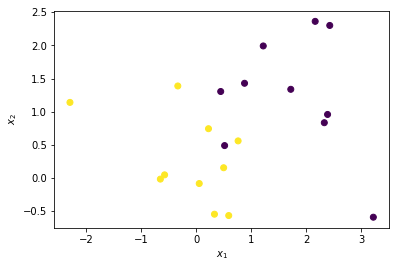

In [5]:
# Visualize training data
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=ytrain)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Training error =  0.05
Testing error =  0.252


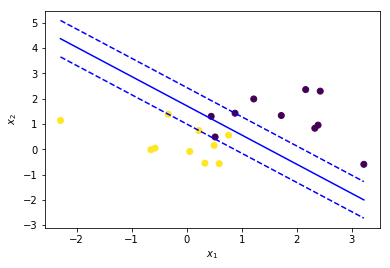

In [6]:
# Parameters
C = 10

# Training
clf = sklearn.svm.LinearSVC(penalty='l2',loss='hinge',C=C)
clf.fit(Xtrain, ytrain)
clf.__dict__

# Training error
yfit = clf.predict(Xtrain)
err_train = error(yfit, ytrain)
print('Training error = ', err_train)

# Testing error
ypred = clf.predict(Xtest)
err_test = error(ypred, ytest)
print('Testing error = ', err_test)

# Visualize training data and separating hyperplane
# Training data
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=ytrain)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
# Separating hyperplane is b0 + b1*x1 + b2*x2 = 0 where (b1,b2) are coefs and b0 is intercept
# Decision boundaries are b0 + b1*x1 + b2*x2 = 1 and b0 + b1*x1 + b2*x2 = -1
x1s = np.linspace(Xtrain[:,0].min(),Xtrain[:,0].max(),100)
x2s = (-clf.intercept_[0]-clf.coef_[0][0]*x1s)/clf.coef_[0][1]
x2sup = (-clf.intercept_[0]-clf.coef_[0][0]*x1s-1)/clf.coef_[0][1]
x2slow = (-clf.intercept_[0]-clf.coef_[0][0]*x1s+1)/clf.coef_[0][1]
plt.plot(x1s,x2s,'b')
plt.plot(x1s,x2sup,'b--')
plt.plot(x1s,x2slow,'b--')
# Plot
plt.show()

In [7]:
# Cross validation
CL = 10**np.linspace(-3,0,100)
cvsL = np.zeros(len(CL))

for i,C in enumerate(CL):
    clf = sklearn.svm.LinearSVC(penalty='l2',loss='hinge',C=C)
    scores = cvs(clf, Xtrain, ytrain, cv=5, scoring='accuracy')
    cvsL[i] = scores.mean()
ibest = np.argmax(cvsL)
Cbest = CL[ibest]

# Training with cross-validated C
clfbest = sklearn.svm.LinearSVC(penalty='l2',loss='hinge',C=Cbest)
clfbest.fit(Xtrain, ytrain)
# Training error
yfit = clfbest.predict(Xtrain)
err_train = error(yfit, ytrain)
print('Training error = ', err_train)

# Testing error
ypred = clfbest.predict(Xtest)
err_test = error(ypred, ytest)
print('Testing error = ', err_test)

Training error =  0.1
Testing error =  0.227


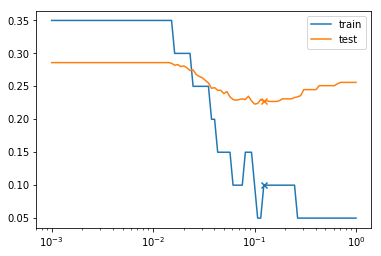

In [8]:
# Train-test error curve
err_train = np.zeros(len(CL))
err_test = np.zeros(len(CL))

for i,C in enumerate(CL):
    # print('C = ', C)
    clf = sklearn.svm.LinearSVC(penalty='l2',loss='hinge',C=C)
    clf.fit(Xtrain, ytrain)
    
    # Training error
    yfit = clf.predict(Xtrain)
    err_train[i] = error(yfit, ytrain)
    # print('Training error = ', err_train[i])
    
    # Testing error
    ypred = clf.predict(Xtest)
    err_test[i] = error(ypred, ytest)
    # print('Testing error = ', err_test[i])

# Plot training and testing error as a function of C
plt.figure()
plt.plot(CL, err_train, label='train')
plt.xscale('log')
plt.plot(CL, err_test, label='test')
plt.legend()
plt.scatter(Cbest, err_train[ibest], marker='x', label='train')
plt.scatter(Cbest, err_test[ibest], marker='x', label='test')
plt.show()